# Задание
1. https://docs.opencv.org/3.4/d1/db7/tutorial_py_histogram_begins.html

2. https://docs.opencv.org/3.4/d5/daf/tutorial_py_histogram_equalization.html

3. https://docs.opencv.org/3.4/dd/d0d/tutorial_py_2d_histogram.html

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


# pt1

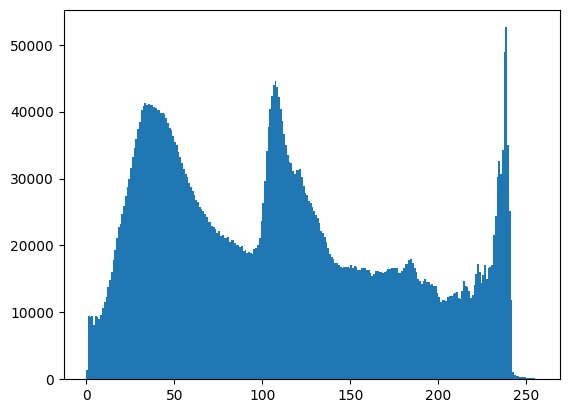

In [3]:
img = cv.imread('resources/lab7/pg1.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
plt.hist(img.ravel(),256,[0,256]); plt.show()

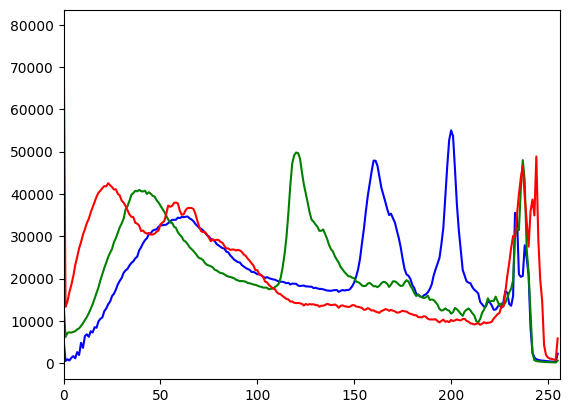

In [4]:
img = cv.imread('resources/lab7/pg1.png')
assert img is not None, "file could not be read, check with os.path.exists()"
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

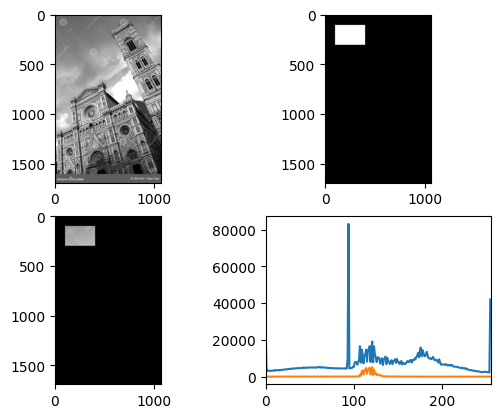

In [9]:
img = cv.imread('resources/lab7/pg2.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

# pt2

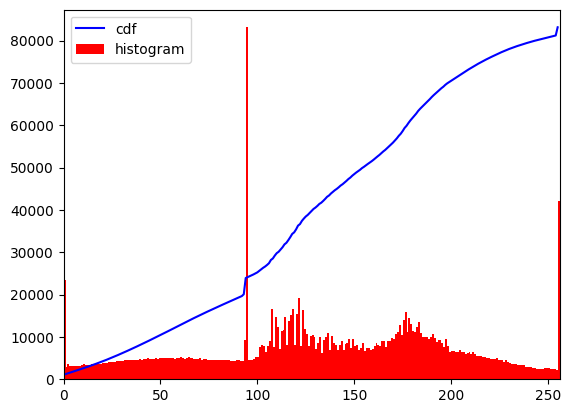

In [11]:
img = cv.imread('resources/lab7/pg2.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [12]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype( 'uint8' )
img2 = cdf[img]

In [21]:
img = cv.imread ( 'resources/lab7/image.png' , cv.IMREAD_GRAYSCALE)
assert img is  not  None , "файл не может быть прочитан, проверьте с помощью os.path.exists()"
equ = cv.equalizeHist (img)
res = np.hstack((img,equ)) #размещение изображений бок о бок
cv.imwrite ( 'resources/lab7/res.png' ,res)

True

In [22]:
import numpy as np
import cv2 as cv
img = cv.imread('resources/lab7/image.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv.imwrite('resources/lab7/res.png',cl1)

True

# pt3

In [23]:
import numpy as np
import cv2 as cv
img = cv.imread('resources/lab7/image.png')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

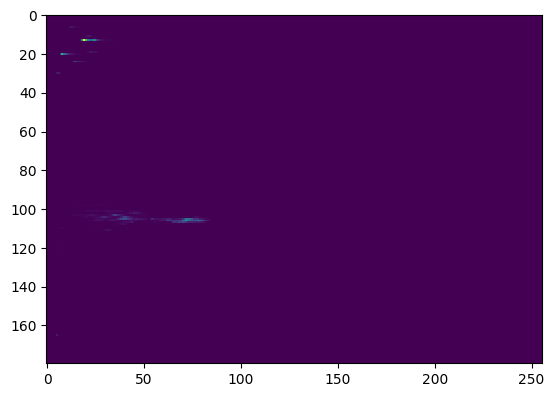

: 

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('resources/lab7/image.png')
assert img is not None, "file could not be read, check with os.path.exists()"
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()